In [1]:
#Importing the library
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
#Getting the data
data = pd.read_csv("C:\\Users\\Abhishek Kumar Singh\\Gradient Descent - Combined Cycle Power Plant\\0000000000002419_training_ccpp_x_y_train.csv", delimiter=",")
print(data.shape)
data.head()

(7176, 5)


# T      V       AP     RH      EP
0   8.58  38.38  1021.03  84.37  482.26
1  21.79  58.20  1017.21  66.74  446.94
2  16.64  48.92  1011.55  78.76  452.56
3  31.38  71.32  1009.17  60.42  433.44
4   9.20  40.03  1017.05  92.46  480.38

In [3]:
data.columns

Index(['# T', ' V', ' AP', ' RH', ' EP'], dtype='object')

In [4]:
data.head()

# T      V       AP     RH      EP
0   8.58  38.38  1021.03  84.37  482.26
1  21.79  58.20  1017.21  66.74  446.94
2  16.64  48.92  1011.55  78.76  452.56
3  31.38  71.32  1009.17  60.42  433.44
4   9.20  40.03  1017.05  92.46  480.38

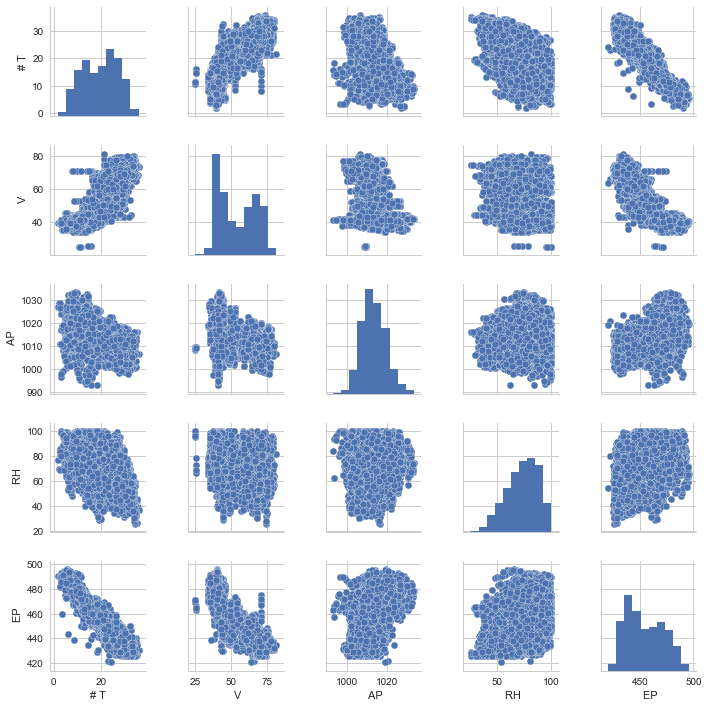

In [5]:
#Printing the graphical representation
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
sns.set(style='whitegrid', context='notebook')
features_plot = data.columns

sns.pairplot(data[features_plot], size=2.0);
plt.tight_layout()
plt.show()

In [6]:
#Feature Scaling
scaler=preprocessing.StandardScaler()
scaler.fit(data)
scaler.transform(data)

array([[-1.47827466e+00, -1.24764165e+00,  1.30221067e+00,
         7.58624590e-01,  1.62423942e+00],
       [ 2.89012041e-01,  3.06797549e-01,  6.61749044e-01,
        -4.46921842e-01, -4.37233891e-01],
       [-3.99975582e-01, -4.21012529e-01, -2.87207194e-01,
         3.75010552e-01, -1.09219167e-01],
       ...,
       [ 1.36062192e+00,  1.18048335e+00, -6.54382840e-01,
        -5.83682640e-01, -9.79450400e-01],
       [-4.36097263e-01,  9.29089763e-04,  7.84140927e-01,
        -6.59584883e-01,  3.23269996e-01],
       [ 1.40209496e+00,  6.07960340e-01, -4.31394890e-01,
        -1.73110573e+00, -5.84315226e-01]])

In [7]:
#Delete the last row after saving to it Y
Y=data[' EP']
del data[' EP']

In [8]:
#Adding one column with value 1
lc=np.ones(data.shape[0])
lc.shape
data['lc']=lc

In [9]:
points=np.array(data)
points.shape

(7176, 5)

# Gradient Descent Implementation

In [10]:
def step_gradient(points, learning_rate, m):
    m_slope = np.zeros(5)
    M = len(points)
    for i in range(M):
        x = points[i]
        y = Y[i]
        for j in range(5):
            m_slope[j] = m_slope[j]+(-2/M)* (y - (m * x).sum() )*x[j]
            
    for j in range(5):
        m[j] = m[j] - learning_rate*m_slope[j]
    
    return m

In [11]:
def gd(points, learning_rate, num_iterations):
    m=np.zeros(5)
    for i in range(num_iterations):
        m = step_gradient(points, learning_rate, m)
        print(i, " Cost: ", cost(points, m))
    return m

In [12]:
def cost(points, m):
    total_cost = 0
    M = len(points)
    for i in range(M):
        x = points[i]
        y = Y[i]
        total_cost += (1/M)*((y - (m*x).sum() )**2)
    return total_cost

In [13]:
def run():
    learning_rate = 0.000000001
    num_iterations = 50
    m = gd(points, learning_rate, num_iterations)
    print(m)
    return m

In [14]:
#Printing the cost 
m=run()

0  Cost:  205946.7858868255
1  Cost:  205095.7546582523
2  Cost:  204248.24454040697
3  Cost:  203404.24096482072
4  Cost:  202563.7294232987
5  Cost:  201726.6954676718
6  Cost:  200893.12470955416
7  Cost:  200063.0028200884
8  Cost:  199236.31552970025
9  Cost:  198413.0486278588
10  Cost:  197593.187962829
11  Cost:  196776.7194414223
12  Cost:  195963.62902876834
13  Cost:  195153.90274806
14  Cost:  194347.5266803207
15  Cost:  193544.48696416235
16  Cost:  192744.76979554887
17  Cost:  191948.36142755835
18  Cost:  191155.24817014308
19  Cost:  190365.41638990166
20  Cost:  189578.8525098362
21  Cost:  188795.5430091274
22  Cost:  188015.4744228946
23  Cost:  187238.63334196885
24  Cost:  186465.00641266187
25  Cost:  185694.5803365346
26  Cost:  184927.34187016945
27  Cost:  184163.27782494415
28  Cost:  183402.37506680528
29  Cost:  182644.62051603626
30  Cost:  181890.00114704508
31  Cost:  181138.50398812295
32  Cost:  180390.11612123874
33  Cost:  179644.82468180615
34  Cos

In [15]:
m

array([8.36138167e-04, 2.32695391e-03, 4.37902779e-02, 3.17619151e-03,
       4.32119185e-05])

In [16]:
#Importing the test file
df=pd.read_csv("C:\\Users\\Abhishek Kumar Singh\\Gradient Descent - Combined Cycle Power Plant\\0000000000002419_test_ccpp_x_test.csv")
df.columns =['# T','V','AP','RH']
df[1]=np.ones(df.shape[0])
print(df.shape)
df.head()

(2391, 5)


# T      V       AP     RH    1
0  12.07  38.25  1012.67  81.66  1.0
1  26.91  74.99  1005.64  78.98  1.0
2  20.58  39.53  1005.68  62.09  1.0
3  16.78  37.20  1011.97  68.94  1.0
4  22.46  58.49  1011.50  70.54  1.0

In [17]:
y_test=[]
x1=np.array(df)
M = x1.shape[0]
for i in range(M):
    x = x1[i]
    z=(m*x).sum()
    y_test.append(z)

In [18]:
y_test=np.array(y_test)
y_test.shape

(2391,)

In [19]:
#Saving the prediction file
np.savetxt("C:\\Users\\Abhishek Kumar Singh\\Gradient Descent - Combined Cycle Power Plant\\Predict_1.csv", y_test, delimiter=',',fmt='%1.5f')

# Gradient Boosting Regression Inbuilt

In [20]:
#Getting the data again 
data1=np.genfromtxt("C:\\Users\\Abhishek Kumar Singh\\Gradient Descent - Combined Cycle Power Plant\\0000000000002419_training_ccpp_x_y_train.csv",delimiter=",")
x_train=data1[:,0:4]
y_train=data1[:,4:5]

In [21]:
x_train.shape,y_train.shape

((7176, 4), (7176, 1))

In [22]:
x_train

array([[   8.58,   38.38, 1021.03,   84.37],
       [  21.79,   58.2 , 1017.21,   66.74],
       [  16.64,   48.92, 1011.55,   78.76],
       ...,
       [  29.8 ,   69.34, 1009.36,   64.74],
       [  16.37,   54.3 , 1017.94,   63.63],
       [  30.11,   62.04, 1010.69,   47.96]])

In [23]:
y_train

array([[482.26],
       [446.94],
       [452.56],
       ...,
       [437.65],
       [459.97],
       [444.42]])

In [24]:
#Importing the inbuilt library for Gradient Descent 
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
algo1=GradientBoostingRegressor(learning_rate=1.9,n_estimators=2000)
algo1

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.9, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=2000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [26]:
#Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [27]:
#Training the data
algo1.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.9, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=2000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [28]:
#Getting the test data
x_test=np.genfromtxt("C:\\Users\\Abhishek Kumar Singh\\Gradient Descent - Combined Cycle Power Plant\\0000000000002419_test_ccpp_x_test.csv",delimiter=",")
y_train.ravel(order='A')
#Prediction
y_predic=algo1.predict(x_test)

In [29]:
#Score of the Regression
algo1.score(x_train,y_train)

0.998540993407853

In [30]:
np.savetxt("C:\\Users\\Abhishek Kumar Singh\\Gradient Descent - Combined Cycle Power Plant\\Predict_2.csv",y_predic,fmt="%.5f")